In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.512893,-0.697835,-2.730948,0.141379,-1.405681,0
1,1.157609,1.198415,0.023487,-1.100475,-1.537781,0
2,-1.075915,-0.974770,0.696205,-1.014408,-0.511932,0
3,-0.323562,0.324728,-1.622348,0.272701,-0.263747,0
4,4.254458,3.044913,0.419582,0.090778,-0.046010,1


In [8]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [51]:
import random
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [98]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\latif\AppData\Local\Temp\ipykernel_13188\4042980177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [99]:
df1.head()

,col1,col3,target
59,2.541901,-0.649694,1
19,0.682617,2.851093,1
6,1.544740,-0.539507,0
21,0.983914,1.511891,1
57,0.011472,0.233533,1


In [100]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\latif\AppData\Local\Temp\ipykernel_13188\4042980177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [101]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\latif\AppData\Local\Temp\ipykernel_13188\4042980177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [102]:
df3.shape

(50, 3)

In [103]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [107]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [108]:
from sklearn.tree import plot_tree

[Text(0.5263157894736842, 0.9, 'x[1] <= -0.434\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.2631578947368421, 0.7, 'x[1] <= -1.241\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(0.39473684210526316, 0.8, 'True  '),
 Text(0.15789473684210525, 0.5, 'x[0] <= -0.71\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.10526315789473684, 0.3, 'x[1] <= -2.088\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.05263157894736842, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.15789473684210525, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21052631578947367, 0.3, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.3684210526315789, 0.5, 'x[1] <= -0.932\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.3157894736842105, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.42105263157894735, 0.3, 'x[0] <= 2.043\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.3684210526315789, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.4736842

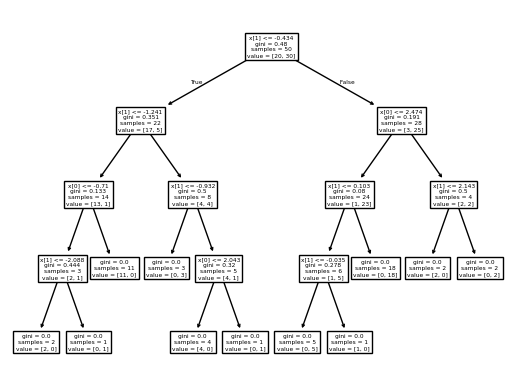

In [109]:
plot_tree(clf1)

[Text(0.45454545454545453, 0.9285714285714286, 'x[1] <= 0.217\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.18181818181818182, 0.7857142857142857, 'x[1] <= -1.692\ngini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(0.3181818181818182, 0.8571428571428572, 'True  '),
 Text(0.09090909090909091, 0.6428571428571429, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.2727272727272727, 0.6428571428571429, 'x[1] <= -0.707\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.18181818181818182, 0.5, 'x[0] <= 0.442\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.09090909090909091, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.2727272727272727, 0.35714285714285715, 'x[0] <= 1.294\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.18181818181818182, 0.21428571428571427, 'x[1] <= -1.241\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.09090909090909091, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.071

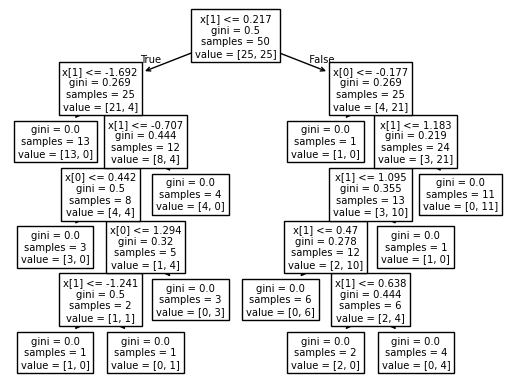

In [110]:
plot_tree(clf2)

[Text(0.8, 0.9375, 'x[0] <= 1.308\ngini = 0.449\nsamples = 50\nvalue = [33, 17]'),
 Text(0.7, 0.8125, 'x[0] <= 0.742\ngini = 0.418\nsamples = 47\nvalue = [33, 14]'),
 Text(0.75, 0.875, 'True  '),
 Text(0.6, 0.6875, 'x[0] <= 0.242\ngini = 0.46\nsamples = 39\nvalue = [25.0, 14.0]'),
 Text(0.5, 0.5625, 'x[1] <= -0.912\ngini = 0.342\nsamples = 32\nvalue = [25, 7]'),
 Text(0.3, 0.4375, 'x[1] <= -1.069\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.2, 0.3125, 'x[1] <= -1.524\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.1, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3, 0.1875, 'x[1] <= -1.303\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4, 0.3125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7, 0.4375, 'x[0] <= -1.884\ngini = 0.18\nsamples = 20\nvalue = [18, 2]'),
 Text(0.6, 0.3125, 'x[0] <= -2.088\ngini = 0.444\nsamples

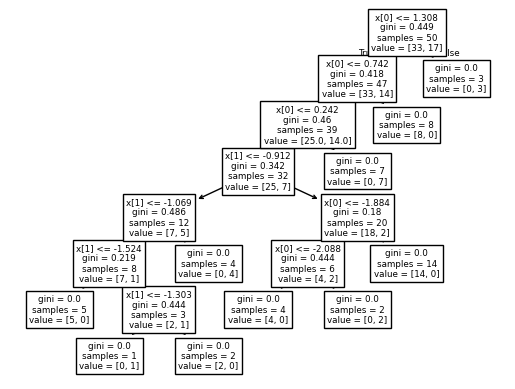

In [111]:
plot_tree(clf3)

In [112]:
clf1.predict(np.array([0.983914,	1.511891]).reshape(1,2))

C:\jupyter\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [114]:
clf2.predict(np.array([0.983914,	1.511891]).reshape(1,2))

C:\jupyter\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [113]:
clf2.predict(np.array([0.983914,	1.511891]).reshape(1,2))

C:\jupyter\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])